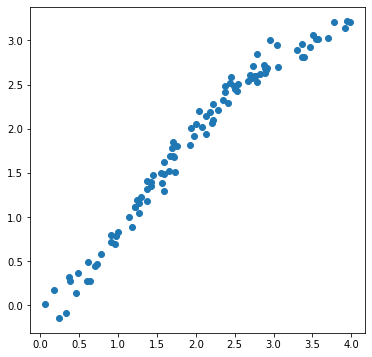

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from biologiclib.modelBase import *

# Initialize random number generator
np.random.seed(123)

# True parameters
alpha, K = 4, 2
sigma = 0.1

# size of dataset
SIZE = 100

# Observed values
X = np.random.uniform(0, 4, SIZE)
Hill = genEquation(
    ModelType.Inducible,
    (ModelSpec.Activation, ModelSpec.No_basal_expression, ModelSpec.Dimerized)
)[0][0]
Y = Hill(X, (alpha, K)) + sigma*np.random.randn(SIZE)

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(X, Y, linestyle='None', marker='o')

Sampling 2 chains, 0 divergences: 100%|██████████| 1200/1200 [00:01<00:00, 650.42draws/s]


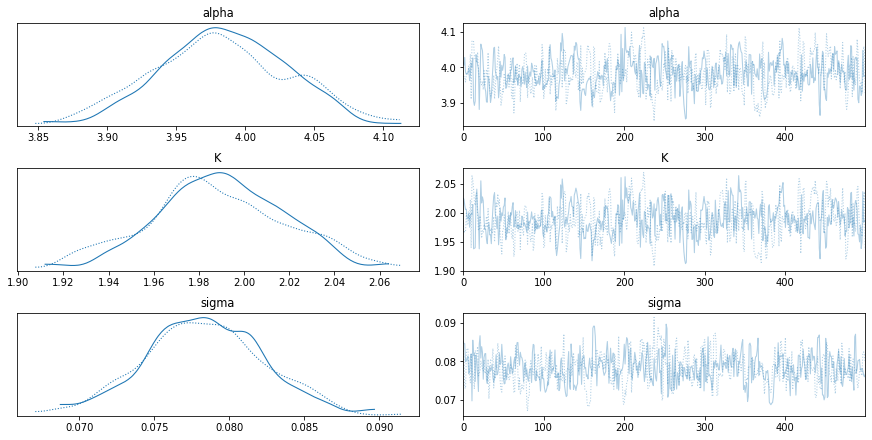

In [2]:
import pymc3 as pm
import warnings
warnings.filterwarnings('ignore')

import logging
logger = logging.getLogger("pymc3")
logger.setLevel(logging.ERROR)

basicModel = pm.Model()
with basicModel:
    
    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=1, sigma=10)
    K = pm.Normal('K', mu=1, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=0.01)
    
    # Expected value of outcome
    mu = Hill(X, (alpha, K))
    
    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=Y)
    
    # Maximum a posteriori method
    #mapEstimate = pm.find_MAP(model=basicModel)
    #print(mapEstimate)
    
    # Sampling method
    trace = pm.sample(draws=500, tune=100)
    pm.traceplot(trace)

Average Loss = -39.973: 100%|██████████| 50000/50000 [00:34<00:00, 1439.04it/s]  


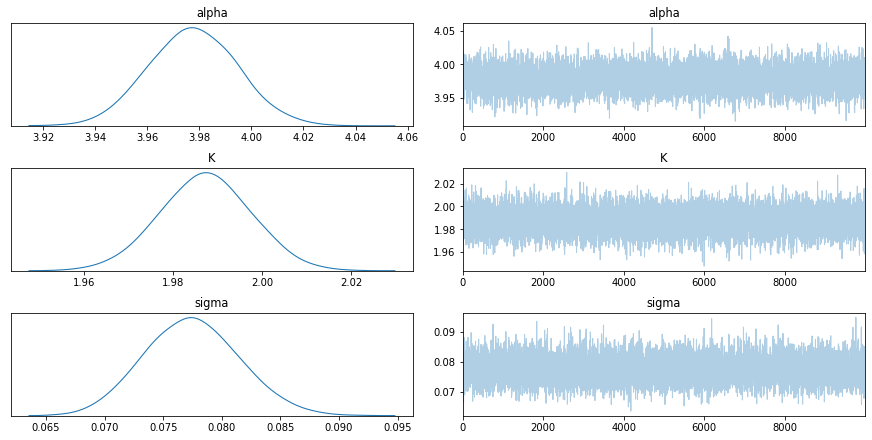

In [4]:
import pymc3 as pm
import warnings
warnings.filterwarnings('ignore')

import logging
logger = logging.getLogger("pymc3")
logger.setLevel(logging.ERROR)

basicModel = pm.Model()
with basicModel:
    
    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=1, sigma=10)
    K = pm.Normal('K', mu=1, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=0.01)
    
    # Expected value of outcome
    mu = Hill(X, (alpha, K))
    
    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=Y)
    
    # VI
    adviFit = pm.fit(method=pm.ADVI(), n=50000)
    trace = adviFit.sample(10000)
    pm.traceplot(trace)

In [ ]:
import pymc3 as pm
import warnings
warnings.filterwarnings('ignore')

import logging
logger = logging.getLogger("pymc3")
logger.setLevel(logging.ERROR)

basicModel = pm.Model()
with basicModel:
    
    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=1, sigma=10)
    K = pm.Normal('K', mu=1, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=0.01)
    
    # Expected value of outcome
    mu = Hill(X, (alpha, K))
    
    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=Y)
    
    # Maximum a posteriori method
    #mapEstimate = pm.find_MAP(model=basicModel)
    #print(mapEstimate)
    
    # VI
    advi_fit = pm.fit(method=pm.ADVI(), n=10000)
    advi_trace = advi_fit.sample(10000)
    pm.traceplot(advi_trace)
    
    # Sampling method
    trace = pm.sample(draws=500, tune=100)
    pm.traceplot(trace)

In [48]:
tracesm = pm.summary(trace)
display(tracesm)
print('alpha:', tracesm.loc['alpha', 'mean'], 'std:', tracesm.loc['alpha', 'sd'])
print('K:', tracesm.loc['K']['mean'], 'std:', tracesm.loc['K']['sd'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,3.980,0.043,3.899,4.060,0.002,0.002,322.0,322.0,323.0,438.0,1.01
K,1.986,0.027,1.935,2.032,0.002,0.001,314.0,314.0,317.0,517.0,1.01
sigma,0.078,0.004,0.071,0.084,0.000,0.000,434.0,434.0,433.0,306.0,1.01


alpha: 3.98 std: 0.043
K: 1.986 std: 0.027
